In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [3]:
fear_df = pd.read_csv('/content/fear_greed_index.csv')
hist_df = pd.read_csv('/content/historical_data.csv')

In [4]:
fear_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [5]:
hist_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


# Load and preprocess data

In [7]:
fear_df['date'] = pd.to_datetime(fear_df['date'])
hist_df['Timestamp IST'] = pd.to_datetime(hist_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
hist_df['date'] = hist_df['Timestamp IST'].dt.date

## Merge datasets

Merge the fear and greed data with the trader data based on date column


In [17]:
hist_df['date'] = pd.to_datetime(hist_df['date'])
merged_df = pd.merge(hist_df, fear_df, on='date', how='inner')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


## Analyze trader performance by sentiment

### Subtask:
Analyze trader performance metrics (e.g., Closed PnL) under different market sentiment classifications (Fear, Extreme Fear, Neutral, Greed, Extreme Greed).


In [18]:
sentiment_performance = merged_df.groupby('classification').agg(
    mean_closed_pnl=('Closed PnL', 'mean'),
    total_size_usd=('Size USD', 'sum')
).reset_index()
sentiment_performance

,classification,mean_closed_pnl,total_size_usd
0,Extreme Fear,34.537862,1.144843e+08
1,Extreme Greed,67.892861,1.244652e+08
2,Fear,54.290400,4.833248e+08
3,Greed,42.743559,2.885825e+08
4,Neutral,34.307718,1.802421e+08


# Plotting

Text(0.5, 1.0, 'Average Closed PnL by Market Sentiment')

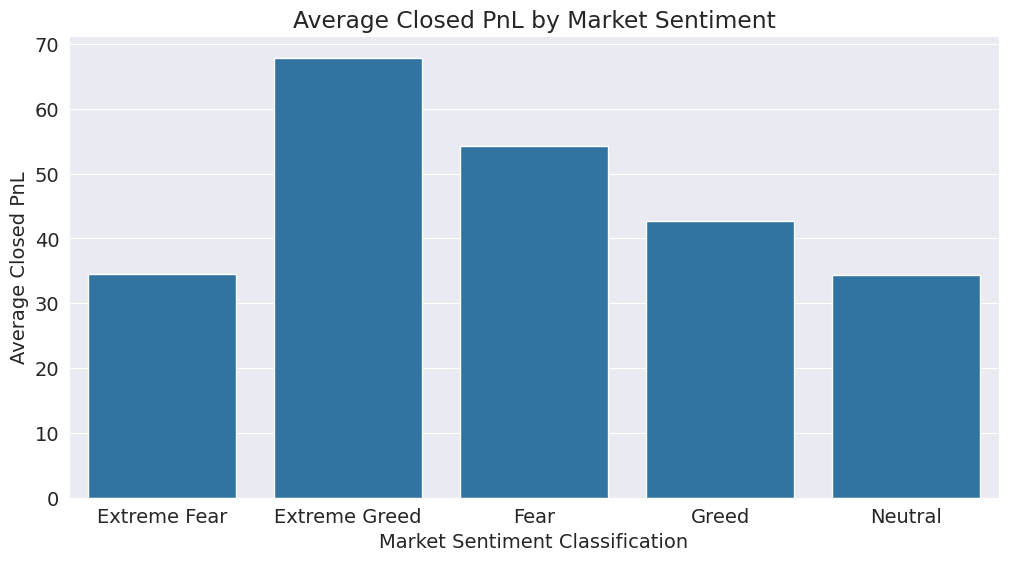

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='classification', y='mean_closed_pnl', data=sentiment_performance)
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.title('Average Closed PnL by Market Sentiment')

Text(0.5, 1.0, 'Total Trading Volume by Market Sentiment')

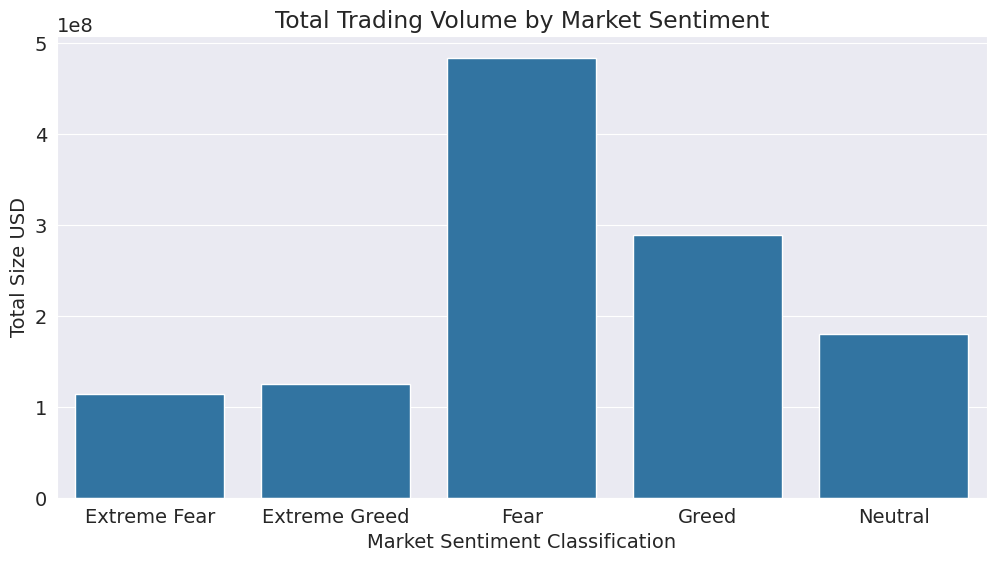

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='classification', y='total_size_usd', data=sentiment_performance)
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Size USD')
plt.title('Total Trading Volume by Market Sentiment')

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


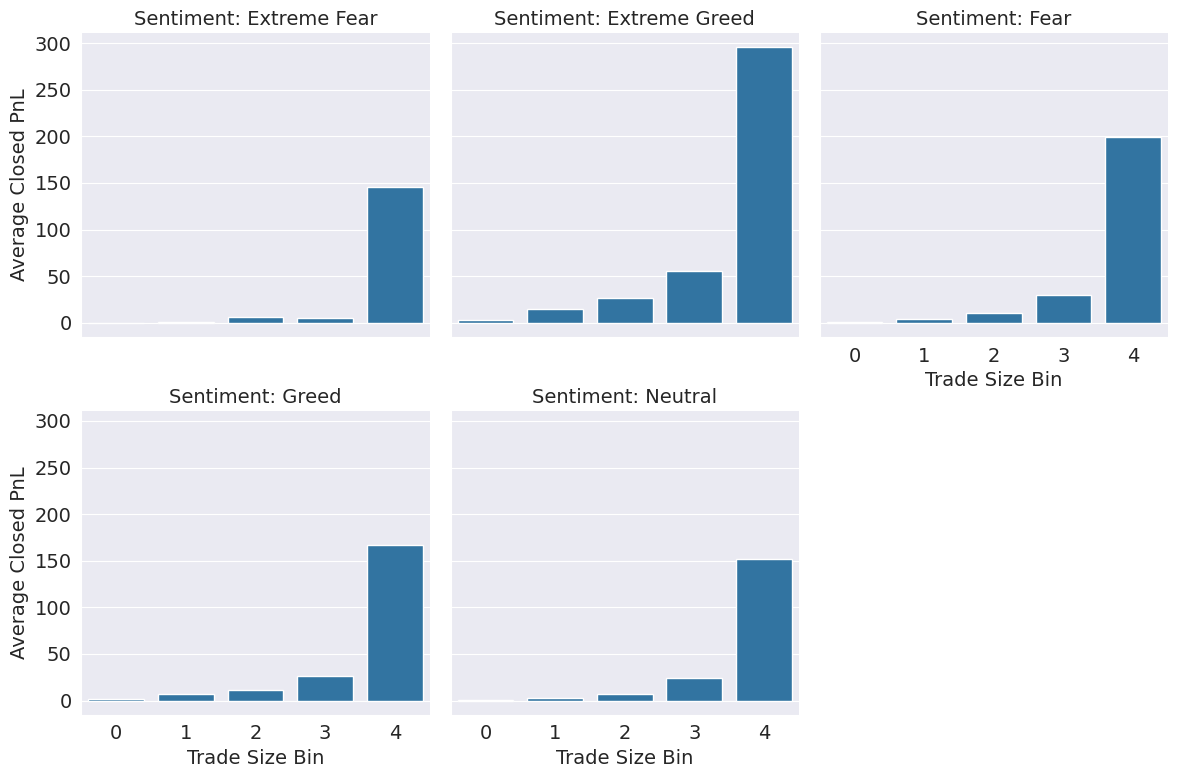

In [30]:
g = sns.FacetGrid(size_sentiment_performance, col="classification", col_wrap=3, height=4)
g.map(sns.barplot, "size_usd_bin", "mean_closed_pnl")
g.set_axis_labels("Trade Size Bin", "Average Closed PnL")
g.set_titles("Sentiment: {col_name}")
plt.tight_layout()
plt.show()

#hidden patterns

### Subtask:
patterns in the data, such as the impact of coin type, trade size,


In [23]:
coin_sentiment_performance = merged_df.groupby(['classification', 'Coin']).agg(
    mean_closed_pnl=('Closed PnL', 'mean'),
    total_size_usd=('Size USD', 'sum')
).reset_index()
coin_sentiment_performance.head()

,classification,Coin,mean_closed_pnl,total_size_usd
0,Extreme Fear,@10,-0.031742,37.26
1,Extreme Fear,@107,-89.588788,2484219.74
2,Extreme Fear,@13,-0.061895,52.86
3,Extreme Fear,@142,15.529335,116035.21
4,Extreme Fear,@16,-0.030214,35.86


In [24]:
print("Coins with highest average PnL per sentiment:")
coin_sentiment_performance.loc[coin_sentiment_performance.groupby('classification')['mean_closed_pnl'].idxmax()]

Coins with highest average PnL per sentiment:


,classification,Coin,mean_closed_pnl,total_size_usd
60,Extreme Fear,PNUT,1855.649224,545.21
202,Extreme Greed,PEOPLE,360.646005,860.57
360,Fear,SEI,835.600000,55413.16
388,Greed,@109,416.218936,5430.19
624,Neutral,DOGE,2969.473495,298882.07


In [25]:

print("\nCoins with lowest average PnL per sentiment:")
coin_sentiment_performance.loc[coin_sentiment_performance.groupby('classification')['mean_closed_pnl'].idxmin()]


Coins with lowest average PnL per sentiment:


,classification,Coin,mean_closed_pnl,total_size_usd
34,Extreme Fear,FARTCOIN,-244.272754,978107.59
98,Extreme Greed,@135,-5981.363990,15.56
375,Fear,WIF,-237.631900,10925.94
551,Greed,TRUMP,-848.852620,1730002.47
597,Neutral,@83,-348.263235,49.07


In [26]:

print("\nCoins with highest total Size USD per sentiment:")
coin_sentiment_performance.loc[coin_sentiment_performance.groupby('classification')['total_size_usd'].idxmax()]


Coins with highest total Size USD per sentiment:


,classification,Coin,mean_closed_pnl,total_size_usd
29,Extreme Fear,BTC,1.731921,3.675152e+07
143,Extreme Greed,BTC,41.413264,4.388193e+07
307,Fear,BTC,48.900673,3.009122e+08
458,Greed,BTC,15.949612,1.642998e+08
621,Neutral,BTC,34.921175,9.838672e+07


In [27]:
merged_df['size_usd_bin'] = pd.qcut(merged_df['Size USD'], q=5, labels=False, duplicates='drop')

size_sentiment_performance = merged_df.groupby(['classification', 'size_usd_bin']).agg(
    mean_closed_pnl=('Closed PnL', 'mean')
).reset_index()
size_sentiment_performance

,classification,size_usd_bin,mean_closed_pnl
0,Extreme Fear,0,-0.413980
1,Extreme Fear,1,0.930586
2,Extreme Fear,2,6.262033
3,Extreme Fear,3,5.509820
4,Extreme Fear,4,145.632230
5,Extreme Greed,0,3.174770
6,Extreme Greed,1,14.778424
7,Extreme Greed,2,26.782530
8,Extreme Greed,3,55.456302
9,Extreme Greed,4,295.736591


Analysis of Trader Performance by Sentiment, Coin, and Trade Size

Coin Type Analysis  
- Some coins perform much better or worse depending on sentiment.  
- PNUT showed strong average PnL in Extreme Fear, while FARTCOIN lagged in the same sentiment.  
- BTC had the highest total trading volume in all sentiment categories, with its best PnL during Fear.  

Trade Size Analysis  
- Larger trade sizes were generally linked to higher average Closed PnL across all sentiments.  
- The effect was strongest in Extreme Greed and Fear.  
- In Extreme Fear, large trades still produced positive PnL, while smaller trades were often flat or negative.  

Potential Further Exploration  
- Check how Execution Price relates to PnL across sentiment states.  
- Study the role of Leverage in trader outcomes by sentiment and trade size.  
- Run statistical tests to validate whether differences across sentiment categories are significant.  


# Deliver insights


# Summary of Findings and Actionable Insights

1. Market Sentiment and Trader Performance  
Traders made the most profits during Fear and Extreme Greed, while results were weaker in Neutral and Extreme Fear markets.  
Trading volume also picked up during Fear and Greed phases.  
Takeaway: Extreme sentiment creates more opportunities.  
Action: Focus activity during Fear and Extreme Greed, and scale back during calmer periods.  

2. Coin Performance by Sentiment  
Not all coins reacted the same way to sentiment.  
BTC traded heavily, with best returns in Fear.  
Certain altcoins outperformed or underperformed depending on the sentiment state.  
Takeaway: Sentiment effects are coin-specific.  
Action: Keep a sentiment-based watchlist to decide which coins to prioritize in different conditions.  

3. Trade Size  
Larger trades tended to generate higher average profits.  
This link was especially strong in Fear and Extreme Greed markets.  
Takeaway: Size matters, particularly in volatile phases.  
Action: Traders with strong risk controls may consider increasing size when sentiment is extreme.  

Overall  
Combining sentiment, coin selection, and trade size makes strategies more effective. A one-size-fits-all approach misses the context that drives results. Aligning trading behavior with sentiment patterns can improve both performance and risk management.


## Summary:

### Data Analysis Key Findings

*   The highest average "Closed PnL" was observed during "Extreme Greed" and "Fear" market sentiments, while "Neutral" and "Extreme Fear" had the lowest.
*   Trading volume ("Size USD") was highest during "Fear" and "Greed" market sentiments.
*   Performance varied significantly across different coin types within the same sentiment classification.
*   Certain altcoins showed exceptionally high or low average PnL during specific sentiment states (e.g., PNUT during Extreme Fear).
*   BTC consistently had the highest total trading volume across all sentiment classifications, but its average PnL varied, being highest during Fear.
*   Generally, larger trade sizes (higher "Size USD") were associated with higher average "Closed PnL" across all sentiment classifications.
*   The positive correlation between trade size and average PnL was more pronounced in "Extreme Greed" and "Fear" sentiments.

### Insights or Next Steps

*   Traders might consider adjusting trading activity and position sizing based on market sentiment, potentially increasing exposure during "Fear" and "Extreme Greed" and reducing it during "Neutral" and "Extreme Fear" periods, while always adhering to individual risk tolerance.
*   Developing a sentiment-based watchlist of coins could help identify assets that historically perform well or poorly during specific market sentiment conditions, informing which assets to trade or avoid.
